
# Jumia Phones Project.

Jumia is one of the largest online shopping website in Africa. In this project, I will web scrape all 50 pages of phones sell on this platform, prepare the data for analysis, and then extract some insights about the phones sell on this platform.

## Scraping the data.

I will scrape the data from "https://www.jumia.co.ke/smartphones/?shipped_from=country_local&page=".

I will scrape from all the webpages from the url

In [12]:
# Importing required libraries
import requests
from bs4 import BeautifulSoup as bs

In [25]:
page = 1
names = []
prices = []

while page != 6:
    url = f"https://www.jumia.co.ke/smartphones/?shipped_from=country_local&page={page}"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "lxml")


    for product_block in soup.find_all("a", class_="core"):
        name = product_block.find("h3", class_="name").text.strip()
        price = product_block.find("div", class_="prc").text.strip()
        names.append(name)
        prices.append(price)

    page = page + 1

In [14]:
import pandas as pd

In [27]:
phone_df = pd.DataFrame({"Name": names, "Price": prices})

* Previewing the data

In [28]:
phone_df.head(10)

,Name,Price
0,"XIAOMI Redmi A2+, 6.52"", 3GB RAM + 64GB (Dual ...","KSh 11,599"
1,"Oppo A17k, 6.56"", 64GB + 3GB RAM (Dual SIM), 5...","KSh 13,999"
2,"Nokia C32, 64GB + 4GB (Upto 7GB RAM) 5000MAh, ...","KSh 16,320"
3,"Infinix Smart 7 HD, 6.6"", 2GB RAM, 64GB, 5000m...","KSh 10,999"
4,"Oppo A17k, 6.56"", 64GB + 3GB RAM (Dual SIM), 5...","KSh 13,999"
5,"Tecno Pop 7, 6.6"" HD+, 2GB + 64GB, 8MP, 4G (D...","KSh 12,099"
6,"Tecno Spark 10 , 6.6"" FHD,128GB ROM+8GB RAM, 5...","KSh 18,999"
7,"Oppo A18,6.6"",128GB+4GB, 8MP, 90Hz, 5000mAh (D...","KSh 17,999"
8,"Nokia C32, 64GB + 4GB (Upto 7GB RAM) 5000MAh, ...","KSh 16,320"
9,"Samsung Galaxy A14, 6.6"", 128GB + 4GB(Dual SIM...","KSh 23,899"


In [17]:
phone_df.dtypes

Name     object
Price    object
dtype: object

* Checking for NA in dataset

In [29]:
phone_df.isnull().sum()

Name     0
Price    0
dtype: int64

* Checking for duplicates in the dataset

In [30]:
phone_df.duplicated().sum()

1

* There is only one duplicate as at this time. I will remove the duplicate.

In [31]:
phone_df=phone_df.drop_duplicates()

In [32]:
phone_df.duplicated().sum()

0

* I will convert the price column to numeric to be able to perform some manipulations and analysis. To do this, I will need to remove the Money symbol.

In [33]:
phone_df['Price'] = phone_df['Price'].str.replace('KSh', '').str.replace(',', '')
phone_df['Price'] = pd.to_numeric(phone_df['Price'])

phone_df.head()

,Name,Price
0,"XIAOMI Redmi A2+, 6.52"", 3GB RAM + 64GB (Dual ...",11599
1,"Oppo A17k, 6.56"", 64GB + 3GB RAM (Dual SIM), 5...",13999
2,"Nokia C32, 64GB + 4GB (Upto 7GB RAM) 5000MAh, ...",16320
3,"Infinix Smart 7 HD, 6.6"", 2GB RAM, 64GB, 5000m...",10999
4,"Oppo A17k, 6.56"", 64GB + 3GB RAM (Dual SIM), 5...",13999


In [34]:
phone_df.min()

Name     Badili - Oppo A15s (Renewed), 6.52",128GB + 6G...
Price                                                 1399
dtype: object

In this project, I want to only do analysis on phones and not accessory. I will assume that any price less than KSH 6000 is accessory.

In [36]:
accessories = phone_df[phone_df['Price'] < 6300]
phone_df=phone_df[phone_df['Price'] >= 6300]

* I will extract  more feature from the Name column using Natural Language Processing.

* I will extract the brand.


In [50]:
from nltk.tokenize import word_tokenize #to create word tokens
import nltk
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
phone_brands = ['infinix', 'xiaomi', 'tecno', 'samsung', 'oppo', 'apple',
                'blackview', 'vivo', 'huawei', 'itel', 'realme', 'nokia',
                'x tigi', 'poco', 'one plus', 'freeyond', 'maxfone', 'umidigi','sowhat',
                'oale','safaricom']
def getbrand(name):
    name = name.lower()
    word_tokens = word_tokenize(name)
    brand = [char for char in word_tokens if char in phone_brands]
    return ''.join(brand)

In [43]:
phone_df['Brand']= phone_df['Name'].apply(getbrand)

In [44]:
phone_df.head()

,Name,Price,Brand
0,"XIAOMI Redmi A2+, 6.52"", 3GB RAM + 64GB (Dual ...",11599,xiaomi
1,"Oppo A17k, 6.56"", 64GB + 3GB RAM (Dual SIM), 5...",13999,oppo
2,"Nokia C32, 64GB + 4GB (Upto 7GB RAM) 5000MAh, ...",16320,nokia
3,"Infinix Smart 7 HD, 6.6"", 2GB RAM, 64GB, 5000m...",10999,infinix
4,"Oppo A17k, 6.56"", 64GB + 3GB RAM (Dual SIM), 5...",13999,oppo


In [45]:
phone_df[phone_df['Brand']=='']

,Name,Price,Brand
98,"Refurbished Y9 2019 6.5"" HiSilicon Kirin 710 (...",12000,


* I will be removing empty cells

In [46]:
import numpy as np

In [47]:
phone_df.replace('',np.nan, inplace=True)

In [48]:
phone_df=phone_df.dropna()

* I will replace plus sign with hyphen.

In [49]:
phone_df['Name'] = phone_df['Name'].str.replace('\s+\s', '-')
phone_df.head()

<ipython-input-49-d4ae51fd551e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  phone_df['Name'] = phone_df['Name'].str.replace('\s+\s', '-')


,Name,Price,Brand
0,"XIAOMI Redmi A2+, 6.52"", 3GB RAM + 64GB (Dual ...",11599,xiaomi
1,"Oppo A17k, 6.56"", 64GB + 3GB RAM (Dual SIM), 5...",13999,oppo
2,"Nokia C32, 64GB + 4GB (Upto 7GB RAM) 5000MAh, ...",16320,nokia
3,"Infinix Smart 7 HD, 6.6"", 2GB RAM, 64GB, 5000m...",10999,infinix
4,"Oppo A17k, 6.56"", 64GB + 3GB RAM (Dual SIM), 5...",13999,oppo


* Now I will extarct the RAM size

In [51]:
words = ['1gb', '2gb', '4gb', '6gb', '8gb', '4ram', '3gb', '1 gb', '6gbram', '12gb', '2G',
        '1 ram', '4 gb', '8 gb', '2 gb', '3 gb', '6 gb', '1ram', 'screen2gb', '4gbram',
        '[8][+]', '[4][+]', '[6][+]', '[1][\s][+]', '8gm']


def getram2(name):
    ram2 = re.findall(r"\b({})\b".format('|'.join(words)), str(name), flags = re.IGNORECASE)
    return ''.join(ram2)

In [52]:
phone_df['RAM'] = phone_df['Name'].apply(getram2)

In [53]:
phone_df.replace('', np.nan, inplace=True)

* extracting the storage size

In [54]:
words = ['16gb', '32gb', '64gb', '128gb', '256gb', '128gbrom', '64rom', '[32][+]',
         '16 GB', '32 gb', '64 gb', '128 gb', '256 gb', '128g', '[+][64]', '64g[+]']


def getrom(name):
    rom=re.findall(r"\b({})\b".format('|'.join(words)), str(name), flags = re.IGNORECASE)
    return ''.join(rom)

In [55]:
phone_df['ROM'] = phone_df['Name'].apply(getrom)
phone_df.replace('', np.nan, inplace=True)

* Extracting the battery capacity

In [56]:
words = ['5000mah', '4230mah', '4000mah', '4750mah', '4,020mah', '6000mah', '2500mh', '5050 mah', '4680 mah',
         '3240mah', '4323mah', '4500mah', '-5000-', '2400mah', '4400mah', '3000mah', '3020mah', '2500mah']
def getbattery(name):
    battery = re.findall(r"\b({})\b".format('|'.join(words)), str(name), flags = re.IGNORECASE)
    return ''.join(battery)

In [57]:
phone_df['battery_size'] = phone_df['Name'].apply(getbattery)
phone_df.replace('', np.nan, inplace=True)

* Extracting the Screen size

In [58]:
words = ['6"', '5"']

def getscreen(name):
    screen = re.findall('([0-9]+[.]+[0-9]+|\d+["])', str(name))
    return ''.join(screen)

In [59]:
phone_df['screnn_size'] = phone_df['Name'].apply(getscreen)
phone_df.replace('', np.nan, inplace=True)

In [60]:
phone_df.isnull().sum()

Name             0
Price            0
Brand            0
RAM              6
ROM              2
battery_size    43
screnn_size      6
dtype: int64

* Now cleaning the data

In [62]:
jumia2=phone_df
jumia2.rename(columns={'RAM': 'ram_space2'}, inplace=True)

* Removing unnecessary string in columns

In [63]:
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("GB",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("gb",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("RAM",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("+",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("GM",'gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("G",'gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("screen2",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("24",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("28",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("26",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("23",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("16",'1gb')
jumia2['ram_space2'] =jumia2['ram_space2'].astype(str)+'gb'

<ipython-input-63-6b3218537aa1>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  jumia2['ram_space2']=jumia2['ram_space2'].str.replace("+",'')


In [64]:
jumia2.rename(columns={'ROM': 'storage'}, inplace=True)
jumia2['storage'].replace(" ", "", inplace = True)
jumia2.rename(columns={'battery_size': 'battery'}, inplace=True)
jumia2['battery'].replace(" ", "", inplace = True)
jumia2['battery'] = jumia2['battery'].str.lower()
jumia2['battery'] = jumia2['battery'].str.replace(" mah", 'mah')
jumia2['battery'] = jumia2['battery'].str.replace("-5000-", '5000mah')
jumia2.rename(columns={'screnn_size': 'screen'}, inplace=True)
jumia2['screen'] = jumia2['screen'].str.replace('"', "")
jumia2['screen'].replace(" ", "", inplace = True)


* Now Vizualizing The Dataset

In [65]:
import matplotlib.pyplot as plt

* The distribution of 'Price'

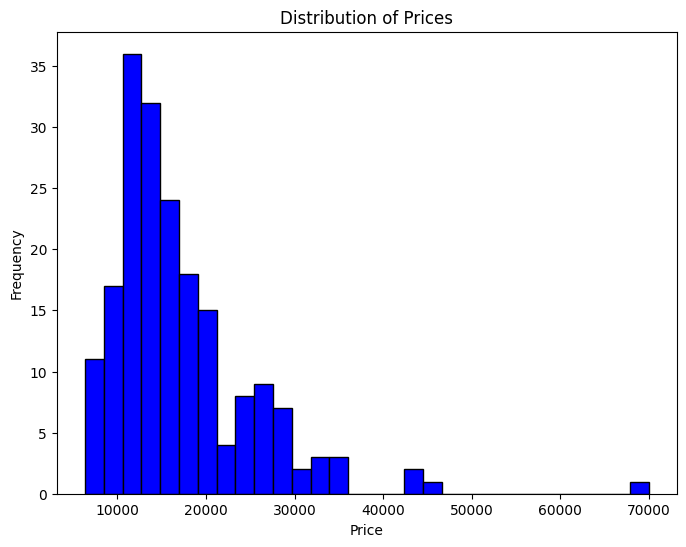

In [66]:
plt.figure(figsize=(8, 6))
plt.hist(jumia2['Price'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

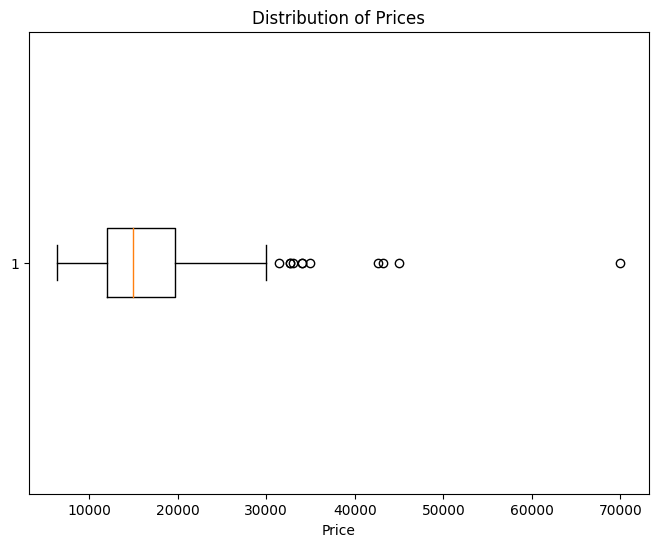

In [67]:
plt.figure(figsize=(8, 6))
plt.boxplot(jumia2['Price'], vert=False)
plt.xlabel('Price')
plt.title('Distribution of Prices')
plt.show()

* The distribution shows that the Price is partially normally distributed, skew to the right.

* Bar plot of the most available brands

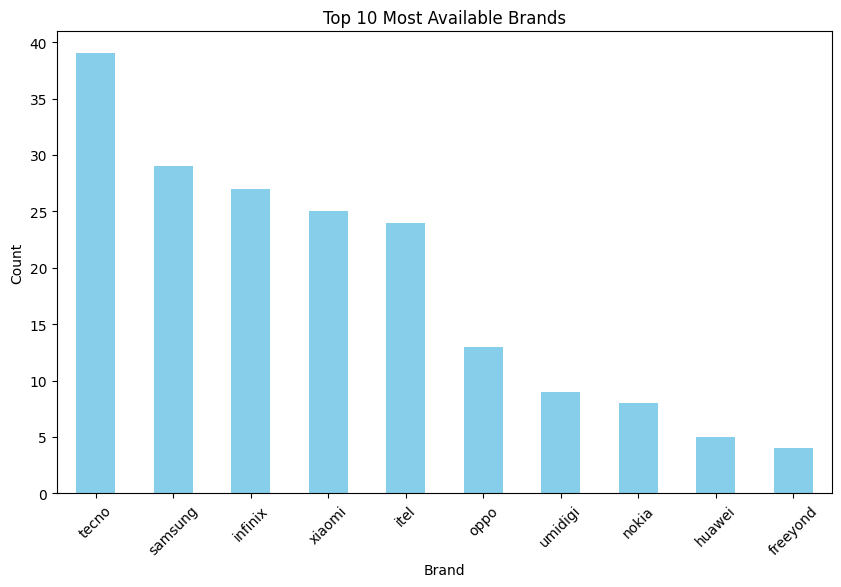

In [68]:
brand_counts = jumia2['Brand'].value_counts()
top_brands = brand_counts.head(10)
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Most Available Brands')
plt.xticks(rotation=45)
plt.show()

* thus shows that most available brand on Jumia Kenya is Tecno phones

* The average price by RAM size of a phone using a bar plot

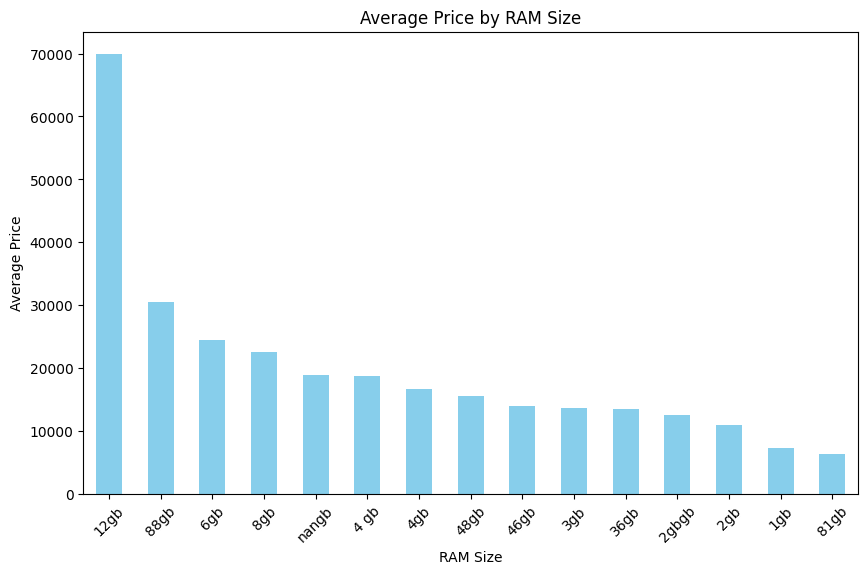

In [69]:
average_price_by_ram = jumia2.groupby('ram_space2')['Price'].mean()

average_price_by_ram = average_price_by_ram.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_price_by_ram.plot(kind='bar', color='skyblue')
plt.xlabel('RAM Size')
plt.ylabel('Average Price')
plt.title('Average Price by RAM Size')
plt.xticks(rotation=45)
plt.show()

* This shows that the phones with higher ram are more expensive

* The distribution of the most common Storage capacity with a bar plot

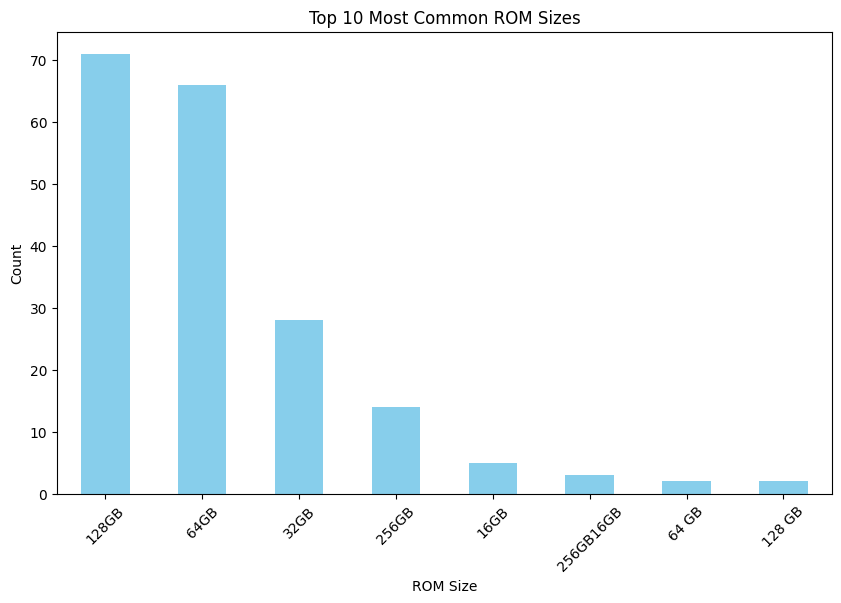

In [70]:
rom_counts = jumia2['storage'].value_counts()

top_roms = rom_counts.head(10)

plt.figure(figsize=(10, 6))
top_roms.plot(kind='bar', color='skyblue')
plt.xlabel('ROM Size')
plt.ylabel('Count')
plt.title('Top 10 Most Common ROM Sizes')
plt.xticks(rotation=45)
plt.show()

* The Plot of average price of each phone brand.

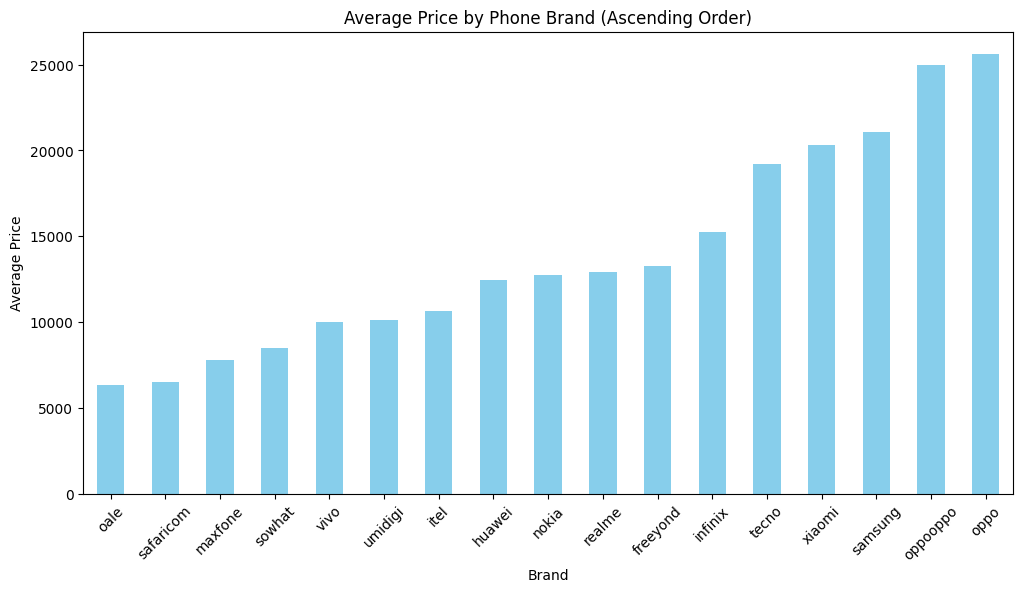

In [71]:
average_price_by_brand = jumia2.groupby('Brand')['Price'].mean()
average_price_by_brand_sorted = average_price_by_brand.sort_values()

plt.figure(figsize=(12, 6))
average_price_by_brand_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Phone Brand (Ascending Order)')
plt.xticks(rotation=45)
plt.show()

* Plot of most common battery capacity in phones

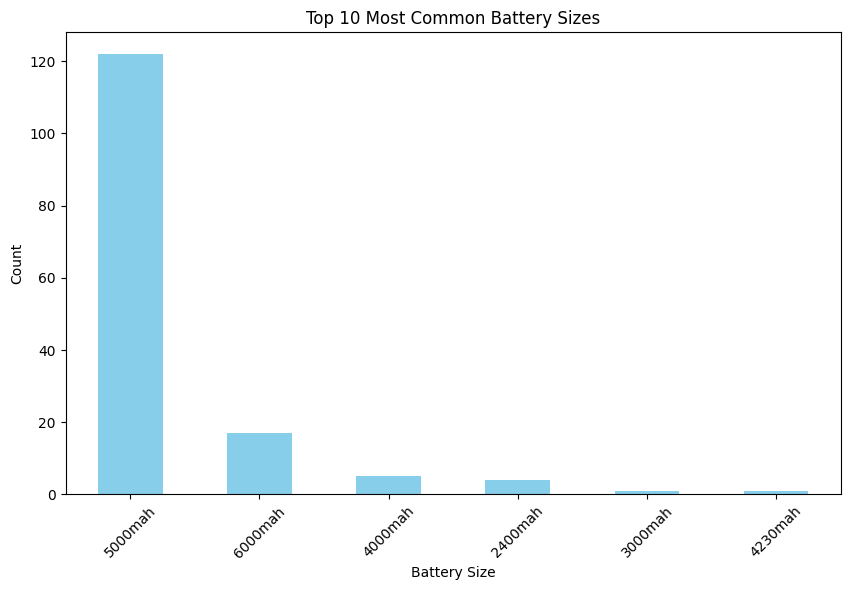

In [73]:
battery_counts = jumia2['battery'].value_counts()

top_battery_sizes = battery_counts.head(10)


plt.figure(figsize=(10, 6))
top_battery_sizes.plot(kind='bar', color='skyblue')
plt.xlabel('Battery Size')
plt.ylabel('Count')
plt.title('Top 10 Most Common Battery Sizes')
plt.xticks(rotation=45)
plt.show()
